# クラスタリング（k-means）

In [5]:
from utility import *

mydata = MyData(class_num=2)
X, y = mydata.get_dataset()

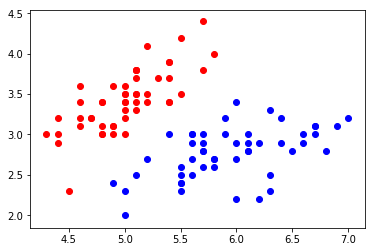

In [6]:
mydata.plot_data()

# sklearnのk-means

In [120]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

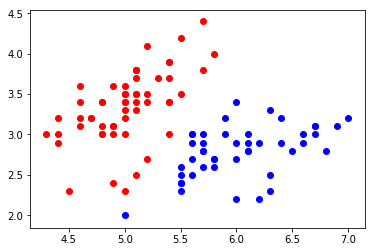

In [121]:
y_pred = kmeans.predict(X)
plt.scatter(X[y_pred==0][:, 0], X[y_pred==0][:, 1], color='red')
plt.scatter(X[y_pred==1][:, 0], X[y_pred==1][:, 1], color='blue')

一部間違っている

# 自分で実装

In [182]:
class MyKmeans():
    def __init__(self, n_clusters, random_state, init='random', max_itr=10):
        self.n_clusters = n_clusters
        self.init = init
        self.random_state = random_state
        self.centers = None
        self.max_itr = max_itr

    def fit(self, X):
        n_clusters = self.n_clusters
        n_samples = len(X)
        if self.init == 'random':
            init = X[np.random.choice(len(X), n_clusters, replace=False)]
            labels = np.array([0 for i in range(n_samples)])
        
        new_labels = np.random.randint(n_clusters, size=n_samples)

        for itr in range(self.max_itr):
            # クラスタに変化がなければ終了
            if (labels == new_labels).all():
                print(itr)
                break

            # クラスタの更新
            labels = np.copy(new_labels)

            # 各クラスタの中心を求める
            centers = []
            for cluster in range(n_clusters):
                center = X[labels==cluster].mean(axis=0)
                centers.append(center)
            centers = np.array(centers)

            # クラスタの割り振りなおし
            new_labels = np.array([])
            for i in range(n_samples):
                tmp = []
                for center in centers:
                    dist = np.linalg.norm(center - X[i])
                    tmp.append(dist)
                new_label = np.argmin(np.array(tmp))
                new_labels = np.append(new_labels, new_label)
        
        self.centers = centers
    
    def predict(self, X):
        n_samples = len(X)
        new_labels = np.array([])
        for i in range(n_samples):
            tmp = []
            for center in self.centers:
                dist = np.linalg.norm(center - X[i])
                tmp.append(dist)
            new_label = np.argmin(np.array(tmp))
            new_labels = np.append(new_labels, new_label)
        return new_labels

7


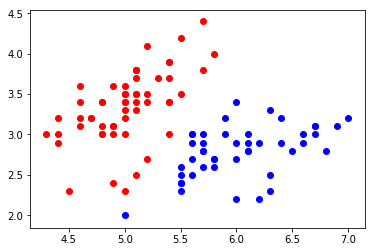

In [210]:
mkmeans = MyKmeans(n_clusters=2, random_state=42, max_itr=10)
mkmeans.fit(X)
y_pred = mkmeans.predict(X)
plt.scatter(X[y_pred==0][:, 0], X[y_pred==0][:, 1], color='red')
plt.scatter(X[y_pred==1][:, 0], X[y_pred==1][:, 1], color='blue')